<a href="https://colab.research.google.com/github/chanjaga/Power-Analysis-Attack/blob/main/%E7%B0%A1%E6%98%93%E5%9E%8B%E3%80%80%E5%8D%98%E7%B4%94%E9%9B%BB%E5%8A%9B%E8%A7%A3%E6%9E%90%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#簡易型　単純電力解析（SPA）
import itertools
import random as rand
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [52]:
#平文
plaintext = [1,1,1,0,0,1,1,0]

#観測リーケージ
obs_leakage = rand.uniform(0,256)

In [53]:
#リーケージモデル
def leakage_model(plaintext,pre_round_key):
  leakage = [0]*2**8
  for i in range(2**8):
    leakage[i] = distance.hamming(plaintext, pre_round_key[i]) + i*1 
  return leakage

In [54]:
#8bit予測鍵の生成
pre_round_key = [list(i) for i in itertools.product([0, 1], repeat=8)]

In [55]:
#リーケージモデルに基づいた予測リーケージの生成
pre_leakage = leakage_model(plaintext,pre_round_key)

In [56]:
#単純電力解析
def spa(obs_leakage,pre_leakage):
  cal = [0]*2**8
  for i in range(2**8):
      cal[i] = abs(obs_leakage - pre_leakage[i])
  plt.plot(cal)
  result_index = cal.index(min(cal))
  return result_index


ラウンド鍵は[1, 0, 0, 1, 1, 0, 0, 1]です


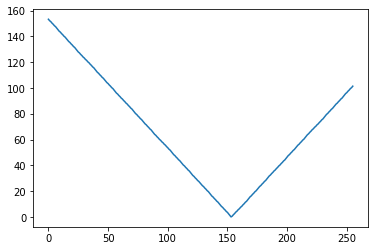

In [57]:
#解析実行
result_index = spa(obs_leakage,pre_leakage)
result = pre_round_key[result_index]
#解析結果
print(f"ラウンド鍵は{result}です")